# Ex 6.5 Unsupervised ML - Clustering 
Contents - 
- 01 Import librabries, data and cleaning 
- 02 Combining PCA and K-means (standardising)
- 03 Elbow Technique 
- 04 K-means Clustering 

## 01 Import libraries, data and drop categorical columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
%matplotlib inline

In [4]:
# Define path

path = r'//Users/amypalomino/Documents/June 22 Final Project/02 Data'

In [5]:
# Import dataframe 

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Natural_Disasters_Final_Clean.csv'),
                index_col = False)

In [6]:
df.shape

(14644, 42)

In [7]:
df.head(5)

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths
0,0,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NaN,NaN,NaN,...,36.0,0.0,0.0,0.0,0.0,NaN,NaN,25000.0,15.001282,Low Death Toll
1,1,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,13.0,0.0,0.0,0.0,0.0,NaN,NaN,72475.0,15.001282,Low Death Toll
2,2,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,200.0,15.001282,NaN
3,3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,300000.0,0.0,3648000.0,0.0,3648000.0,NaN,NaN,86400.0,15.001282,Very High Death Toll
4,4,1970-0026-BGD,1970,26,Natural,Meteorological,Storm,NaN,NaN,NaN,...,17.0,0.0,110.0,0.0,110.0,NaN,NaN,NaN,15.001282,Low Death Toll


In [8]:
# Drop Unnamed column
df =df.drop(columns = ['Unnamed: 0'])

In [9]:
# Enable max columns to be displayed 

pd.options.display.max_columns = None

In [10]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
       'Reconstruction Costs US$', 'Insured Damages US$', 'Total Damages US$',
       'CPI', 'Deaths'],
      dtype='object')

In [11]:
df.dtypes

Dis No                       object
Year                          int64
Seq                           int64
Disaster Group               object
Disaster Subgroup            object
Disaster Type                object
Disaster Subtype             object
Disaster Subsubtype          object
Event Name                   object
Country                      object
ISO                          object
Region                       object
Continent                    object
Location                     object
Origin                       object
Associated Dis               object
Associated Dis2              object
OFDA Response               float64
Appeal                      float64
Declaration                 float64
Aid Contribution            float64
Dis Mag Value               float64
Dis Mag Scale                object
Latitude                     object
Longitude                    object
Start Year                    int64
Start Month                 float64
Start Day                   

In [12]:
df.isnull().sum()

Dis No                          0
Year                            0
Seq                             0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype             2747
Disaster Subsubtype         13600
Event Name                  10999
Country                         0
ISO                             0
Region                          0
Continent                       0
Location                     1346
Origin                      10864
Associated Dis              11412
Associated Dis2             13946
OFDA Response                   0
Appeal                          0
Declaration                     0
Aid Contribution            13967
Dis Mag Value                   0
Dis Mag Scale                1073
Latitude                    12313
Longitude                   12309
Start Year                      0
Start Month                   268
Start Day                    3067
End Year                        0
End Month     

### Replacing NaN with 0

In [13]:
df['Aid Contribution'].fillna(0, inplace = True)

In [14]:
df['Start Month'].fillna(0, inplace = True)
df['Start Day'].fillna(0, inplace = True)
df['End Month'].fillna(0, inplace = True)
df['End Day'].fillna(0, inplace = True)
df['Reconstruction Costs US$'].fillna(0, inplace = True)
df['Insured Damages US$'].fillna(0, inplace = True)
df['Total Damages US$'].fillna(0, inplace = True)
df['CPI'].fillna(0, inplace = True)

In [15]:
df.isnull().sum()

Dis No                          0
Year                            0
Seq                             0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype             2747
Disaster Subsubtype         13600
Event Name                  10999
Country                         0
ISO                             0
Region                          0
Continent                       0
Location                     1346
Origin                      10864
Associated Dis              11412
Associated Dis2             13946
OFDA Response                   0
Appeal                          0
Declaration                     0
Aid Contribution                0
Dis Mag Value                   0
Dis Mag Scale                1073
Latitude                    12313
Longitude                   12309
Start Year                      0
Start Month                     0
Start Day                       0
End Year                        0
End Month     

### Removing categorical columns

In [16]:
df_2 = df.drop(columns = ['Dis No', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2','Dis Mag Scale','Latitude', 'Longitude','Deaths'])

In [17]:
df_2.shape

(14644, 22)

In [18]:
df_2.head(5)

,Year,Seq,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI
0,1970,13,0.0,0.0,0.0,0.0,0.0,1970,1.0,4.0,1970,1.0,4.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,15.001282
1,1970,109,0.0,0.0,0.0,0.0,0.0,1970,1.0,0.0,1970,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,72475.0,15.001282
2,1970,44,1.0,0.0,0.0,0.0,0.0,1970,9.0,0.0,1970,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,15.001282
3,1970,63,1.0,0.0,0.0,0.0,0.0,1970,11.0,12.0,1970,11.0,12.0,300000.0,0.0,3648000.0,0.0,3648000.0,0.0,0.0,86400.0,15.001282
4,1970,26,0.0,0.0,0.0,0.0,0.0,1970,4.0,13.0,1970,4.0,13.0,17.0,0.0,110.0,0.0,110.0,0.0,0.0,0.0,15.001282


In [19]:
df_2.isnull().sum()

Year                        0
Seq                         0
OFDA Response               0
Appeal                      0
Declaration                 0
Aid Contribution            0
Dis Mag Value               0
Start Year                  0
Start Month                 0
Start Day                   0
End Year                    0
End Month                   0
End Day                     0
Total Deaths                0
No Injured                  0
No Affected                 0
No Homeless                 0
Total Affected              0
Reconstruction Costs US$    0
Insured Damages US$         0
Total Damages US$           0
CPI                         0
dtype: int64

## 03 Combining PCA and K-means

In [20]:
# For standardising features, import the Standard Scaler module 
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_2)

### Dimensionality Reduction with PCA

In [22]:
# import PCA module 
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
pca.fit(df_std)

PCA()

In [24]:
# how much variance is explained by the 22 components
pca.explained_variance_ratio_

array([1.75381985e-01, 1.04025148e-01, 9.44289588e-02, 7.97191127e-02,
       7.04852536e-02, 5.96728429e-02, 5.42441182e-02, 4.54563000e-02,
       4.53403119e-02, 4.17737501e-02, 4.07161593e-02, 3.88813178e-02,
       3.69577923e-02, 3.51335522e-02, 3.45430680e-02, 1.42982462e-02,
       1.24913595e-02, 9.45924382e-03, 6.97728853e-03, 1.24616207e-05,
       1.72938696e-06, 1.39000774e-33])

Text(0, 0.5, 'Cumulative Exlpained Varaince')

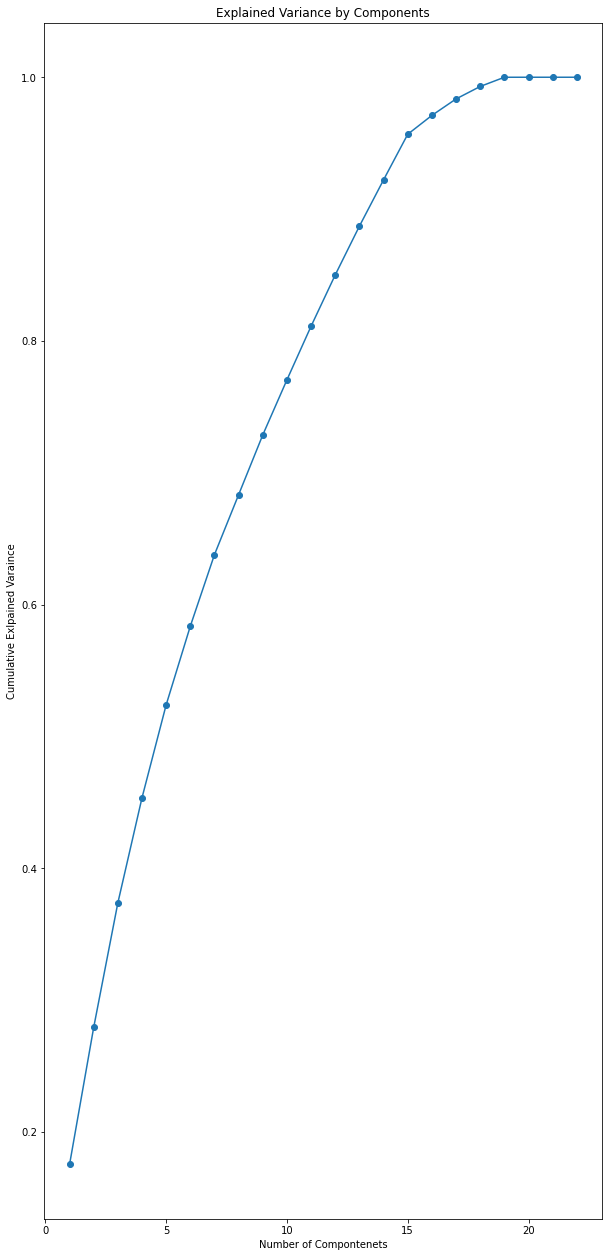

In [25]:
plt.figure(figsize = (10,22))
plt.plot(range(1,23), pca.explained_variance_ratio_.cumsum(),marker = 'o')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Compontenets')
plt.ylabel('Cumulative Exlpained Varaince')

In [26]:
# Preserving 80% of the variance - 10 components 
pca= PCA(n_components = 10)

In [27]:
# Fit the 10 components to the model
pca.fit(df_std)

PCA(n_components=10)

In [28]:
pca.transform(df_std)

array([[ 5.11574659, -0.13259284, -1.1768256 , ...,  0.05334425,
         0.0835721 ,  0.1751478 ],
       [ 5.22683953, -0.02294493, -1.50225095, ...,  0.05394741,
         0.11567304,  0.18948776],
       [ 5.26937811, -0.15213357,  0.81300953, ...,  0.11429512,
         0.21236613,  0.14644972],
       ...,
       [-1.55145179,  0.0990583 ,  0.03617932, ..., -0.18030178,
        -0.31766606,  0.84063565],
       [-1.31193782,  0.51467621, -1.98588349, ..., -0.11761268,
        -0.30642871,  0.87405168],
       [-0.88093091,  0.05454436, -0.59747668, ..., -0.02094414,
        -0.01671873,  0.02314905]])

In [29]:
scores_pca = pca.transform(df_std)

### K-means clustering with PCA 

In [30]:
# Fit k-means using the transformed data from the PCA

wcss = []      # WCSS (Within Cluster Sum of Squares)
for i in range(1,23): # 22 potential clusters 
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

## 04 The elbow technique

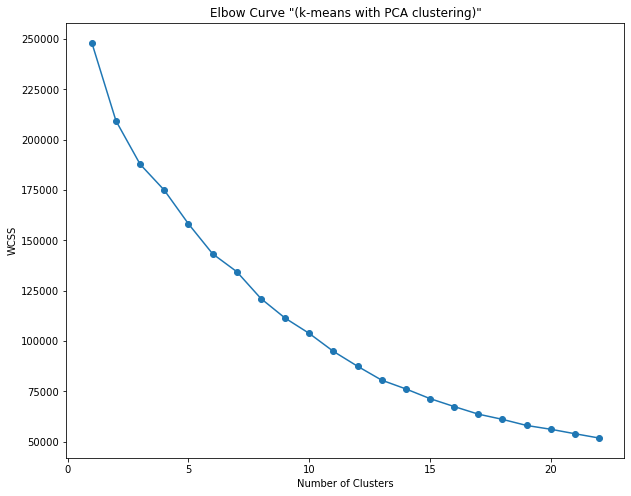

In [31]:
# Plot the wcss to demonstrate the elbow curve 
plt.figure(figsize = (10,8))
plt.plot(range(1,23), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve "(k-means with PCA clustering)"')
plt.show()

### Number of clusters
- The elbow curve is smoother making the choice of clusters more difficult. There's a bit of a drop after the 4th so I'm going to opt for 4 clusters.

## 04 K-means Clustering 

In [32]:
# Using 4 clusters 

kmeans_pca = KMeans(n_clusters = 4, n_jobs = -1)

In [33]:
# Fit data with the k-means pca model 

kmeans_pca.fit(scores_pca)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [34]:
# Create new df with original features and add the PCA scores and clusters 

df_new = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_new.columns.values[-7:] = ['Component 1','Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7']

df_new['Clusters'] = kmeans_pca.labels_

In [35]:
df_new.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths,0,1,2,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Clusters
0,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NaN,NaN,NaN,Argentina,ARG,South America,Americas,Mendoza,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Km2,NaN,NaN,1970,1.0,4.0,1970,1.0,4.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,15.001282,Low Death Toll,5.115747,-0.132593,-1.176826,0.527047,1.144816,-0.454188,0.214389,0.053344,0.083572,0.175148,0
1,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,1.0,0.0,1970,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,72475.0,15.001282,Low Death Toll,5.226840,-0.022945,-1.502251,0.531575,0.758034,-0.515811,0.287021,0.053947,0.115673,0.189488,0
2,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NaN,NaN,NaN,Benin,BEN,Western Africa,Africa,Atacora region,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,Km2,NaN,NaN,1970,9.0,0.0,1970,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,15.001282,NaN,5.269378,-0.152134,0.813010,0.200511,-1.569183,1.010643,-0.845318,0.114295,0.212366,0.146450,0
3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,11.0,12.0,1970,11.0,12.0,300000.0,0.0,3648000.0,0.0,3648000.0,0.0,0.0,86400.0,15.001282,Very High Death Toll,6.400869,4.942850,4.899774,5.134908,-1.382851,23.981083,23.200344,-0.577598,1.411657,-6.446777,0
4,1970-0026-BGD,1970,26,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,4.0,13.0,1970,4.0,13.0,17.0,0.0,110.0,0.0,110.0,0.0,0.0,0.0,15.001282,Low Death Toll,4.760604,-0.545130,0.360700,0.336195,1.160294,-0.318314,0.017699,0.027825,-0.001807,0.123496,0


In [36]:
df_new['Clusters'].value_counts()

1    9121
0    5504
3      14
2       5
Name: Clusters, dtype: int64

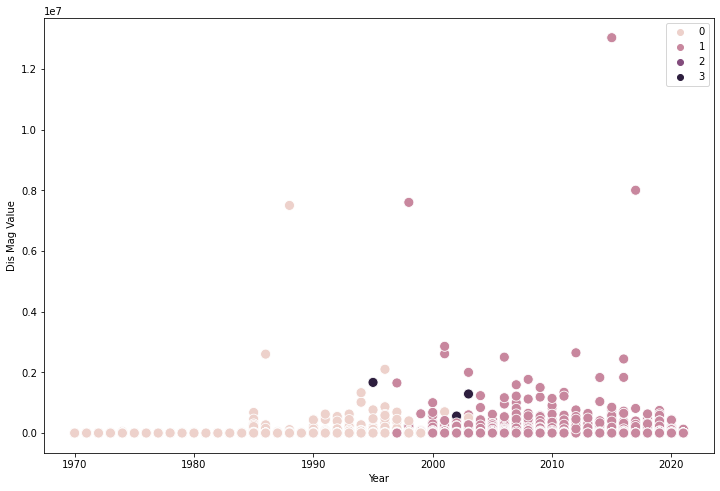

In [37]:
# Plot the clusters for 'Year' and 'Mag Value'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Year'], y= df_new['Dis Mag Value'], hue=kmeans_pca.labels_, s= 100)

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Dis Mag Value')
plt.show()

### Thoughts
- Some thing changed at the turn of the century. There is a clear divide between pre-2000's and post-2000. 
- It looks like there is an increase in the volume of disasters that are recorded with a magnitude value above 0 from this point onwards too

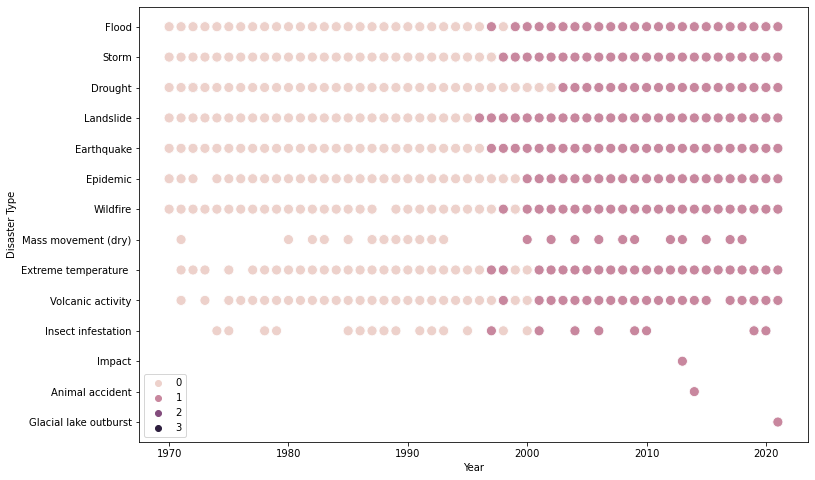

In [38]:
# Plot the clusters for 'Year' and 'Disaster Type'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Year'], y= df_new['Disaster Type'], hue=kmeans_pca.labels_, s= 100)

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Disaster Type')
plt.show()

### Thoughts - 
- Similar story here with the split around 2000. Whatever category 1 represents, it happened with more frequency around this time and continued across all disaster types

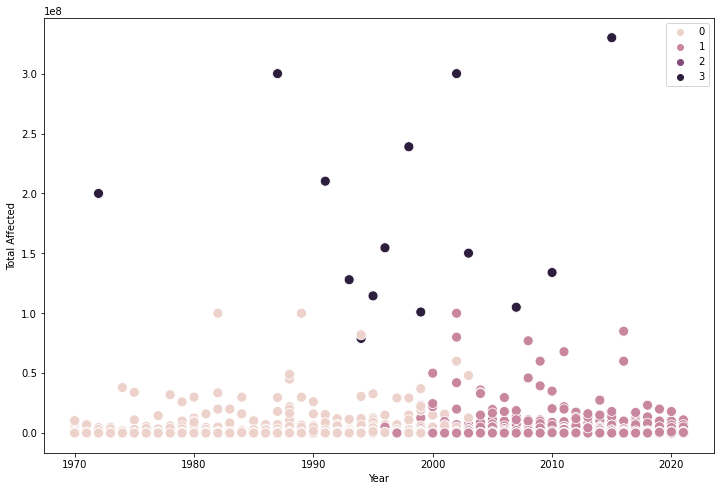

In [39]:
# Plot the clusters for 'Year' and 'Total Affected'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Year'], y= df_new['Total Affected'], hue=kmeans_pca.labels_, s= 100)

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.show()

### Thoughts - 
- This scatter chart reveals some really interesting insights and finally sheds some light onto what the clusters might be grouping. The darkest purple dominates the top half of the chart indicating these are disasters affecting the most people. They don't follow any sort of trend though. 

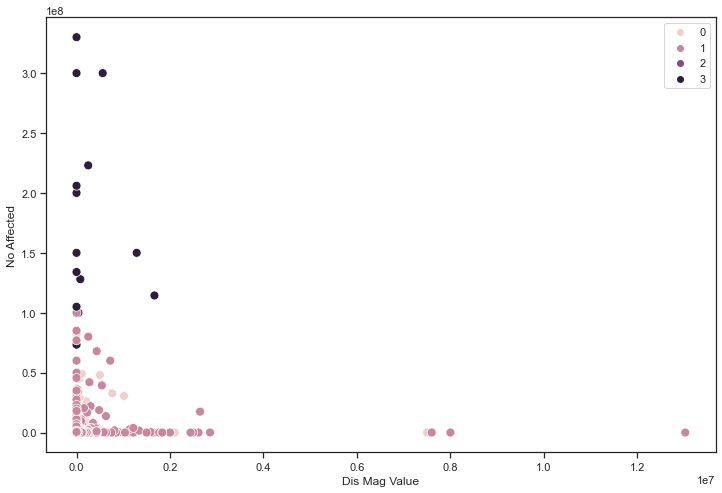

In [48]:
# Plot the clusters for 'No Affected' and 'Dis Mag Value'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Dis Mag Value'], y= df_new['No Affected'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Dis Mag Value')
plt.ylabel('No Affected')
plt.show()

### Thoughts - 
- Disaster Magnitude doesn't show a strong correlation with the no affected but the clusters are still indicating a significant difference between the the darker hue and the lighter. I think this falls to the No affected again. 

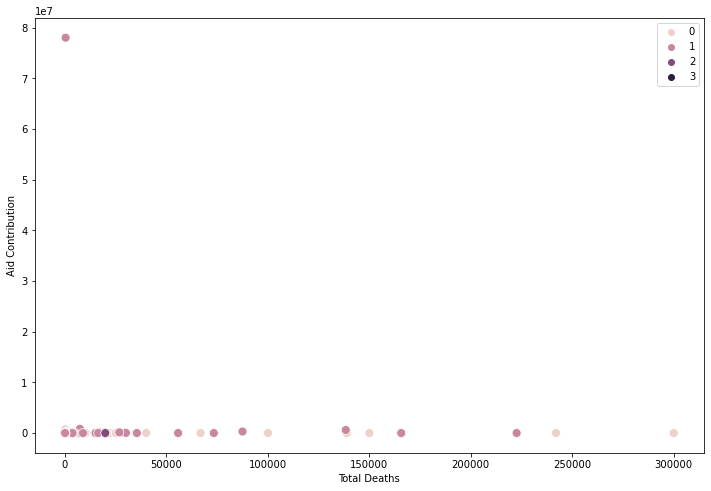

In [41]:
# Plot the clusters for 'Total Deaths' and 'Aid Contribution'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Total Deaths'], y= df_new['Aid Contribution'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Total Deaths')
plt.ylabel('Aid Contribution')
plt.show()

### Thoughts - 
- This isn't very insightful. Aid contribution doesn't have enough records to begin with to make a meaningful comparission with any other variable in the first place. 

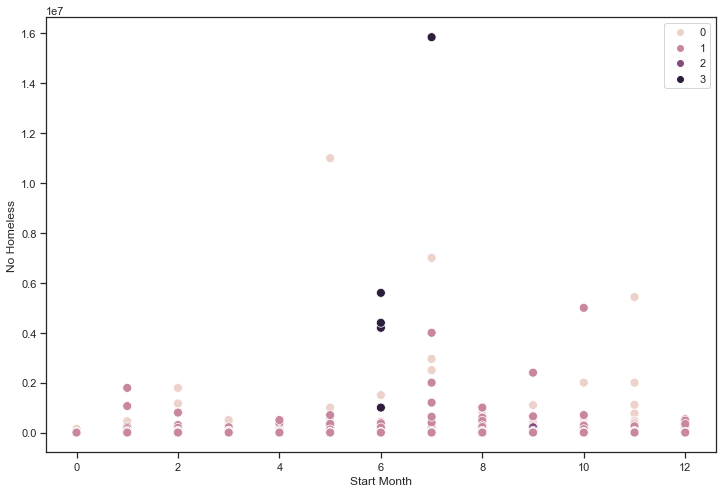

In [50]:
# Plot the clusters for 'No Homeless' and 'Start Month'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Start Month'], y= df_new['No Homeless'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Start Month')
plt.ylabel('No Homeless')
plt.show()

### Thoughts - 
- This is quite intersting, the most instances of homlessness occur in the middle of the year when looking at the darkest hue again. There might be more patterns like these that I should explore. 

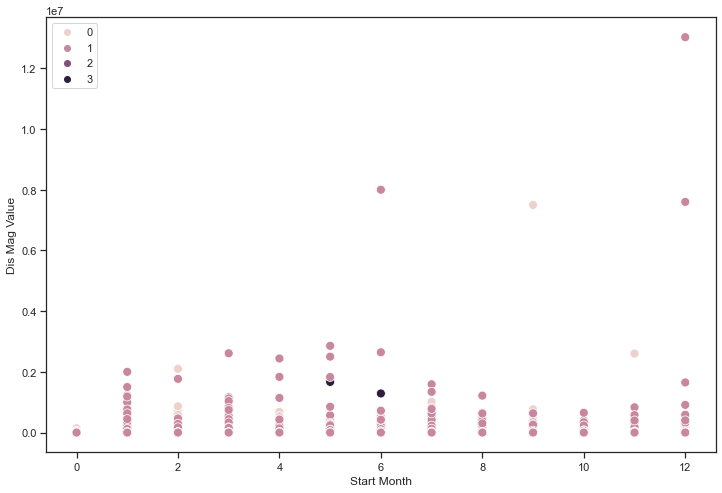

In [51]:
# Plot the clusters for 'Dis Mag Value' and 'Start Month'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Start Month'], y= df_new['Dis Mag Value'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Start Month')
plt.ylabel('Dis Mag Value')
plt.show()

### Thoughts - 
- I'm not sure what to infer by this - There are mosre of cluster 1. It's tricky to tell the density of the dots. Another chart type might be useful to understand this better

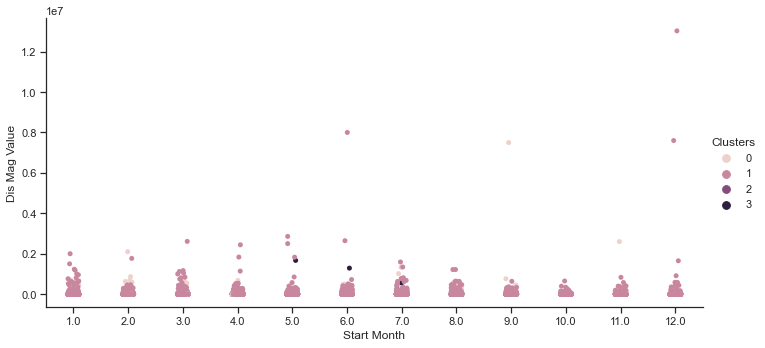

In [57]:
sns.set(style='ticks')
g = sns.catplot(x='Start Month', y='Dis Mag Value', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(.5,12.5))

### Thoughts - 
- Easier to spot density like this as least and indicates the disasters that occured from 2020 onwards have a higher magnitude value from Dec through to June before dropping off

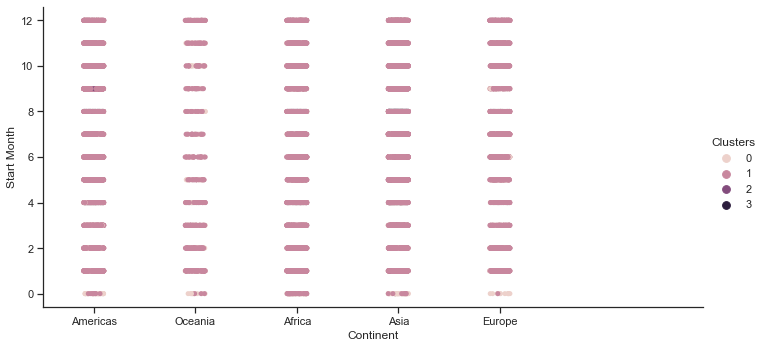

In [59]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='Start Month', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(-.5,6))

### Thoughts - 
- I don't get a huge amount out of this. Other than perhpas Oceania sees fewer disasters generally?

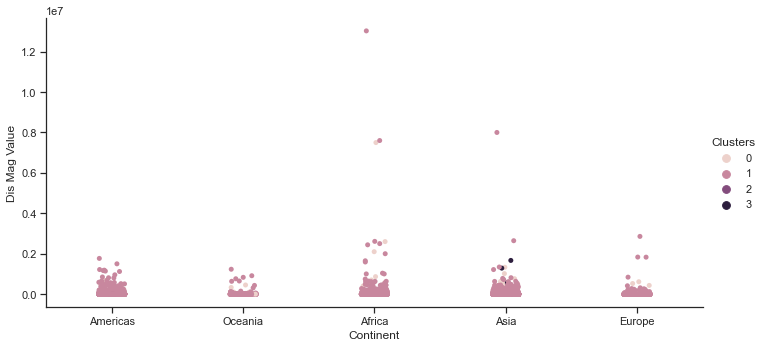

In [60]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='Dis Mag Value', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(-.5,4.5))

### Thoughts - 
- Looks like America is mostly made up of cluster 1, whereas Asia has 3 present. If the darker hue does indicate the number of people affected, it seems that Asia might be the continent that suffers more from this particular outcome following a disaster.

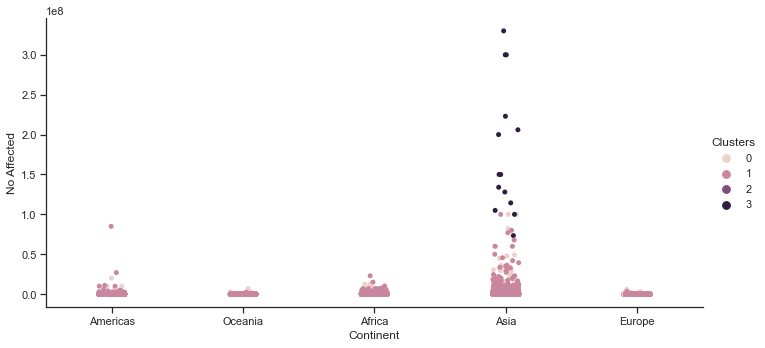

In [61]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='No Affected', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(-.5,4.5))

### Thoughts - 
- This confirms my suspison that Asia is much more affected by disasters than the rest of the world.

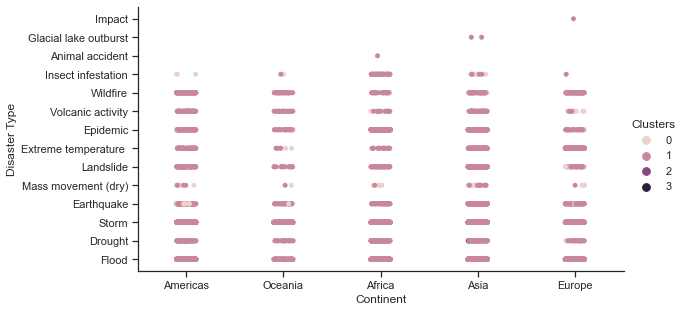

In [66]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='Disaster Type', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4),height = 4.5, aspect = 2)
g = g.set(xlim=(-.5,4.5))

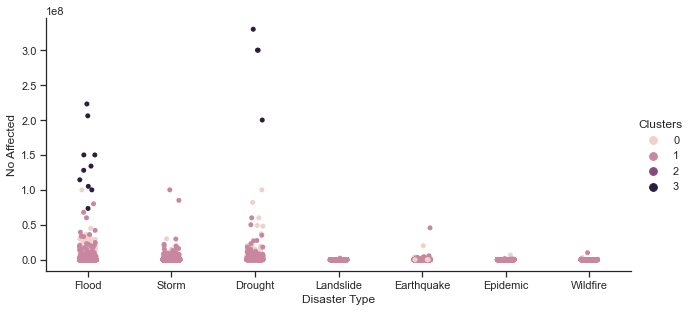

In [77]:
# Plot the clusters for 'Disaster Type' and 'No Affected'

sns.set(style='ticks')
g = sns.catplot(x='Disaster Type', y='No Affected', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4),height = 4.5, aspect = 2)
g = g.set(xlim=(-.5,6.5))

### Thoughts - 
- Flood and Drought appear to have the most affect on people, confimred by the clusters. 


In [46]:
df_new.loc[df_new['Clusters'] == 3, 'Cluster'] = 'dark purple'
df_new.loc[df_new['Clusters'] == 2, 'Cluster'] = 'purple'
df_new.loc[df_new['Clusters'] == 1, 'Cluster'] = 'pink'
df_new.loc[df_new['Clusters'] == 0, 'Cluster'] = 'light pink'

In [47]:
df_new.groupby('Cluster').agg({'Total Deaths':['mean', 'median'],
                              'Aid Contribution':['mean', 'median'],
                              'No Homeless':['mean', 'median'],
                              'Year':['mean', 'median'],
                              'Dis Mag Value':['mean', 'median']})

Total Deaths        Aid Contribution          No Homeless  \
                    mean median             mean median          mean   
Cluster                                                                 
dark purple  1079.000000  776.0     15743.285714   73.0  2.217857e+06   
light pink    405.241824    9.0       348.887718    0.0  1.558895e+04   
pink          155.974893    6.0      9074.041333    0.0  4.981276e+03   
purple       4385.600000   97.0         0.000000    0.0  6.140000e+04   

                             Year          Dis Mag Value         
              median         mean  median           mean median  
Cluster                                                          
dark purple      0.0  1997.285714  1997.0  277638.357143    0.0  
light pink       0.0  1988.389898  1990.0    7588.237645    0.0  
pink             0.0  2009.565947  2009.0   20349.126181    0.0  
purple       27000.0  2013.400000  2017.0     208.800000  240.0

### Thoughts - 
- The darkest purple stands out as having the highest values for Deaths, Aid and Homelessness. These disasters have been grouped as being the most devastaing to human life. 
- Whats insteresting is that the dark purple actually has a mean and median Year of 1997, when I had made an assumption that it fell into the same time frame as the purple. 
- I am concerned that the extreme values I left unchanged in the Dis Mag Value has casued some bias in my model. The mean values for pink and dark purple are HUGE and I think have been affected by those outliers. I regret no imputing them somehow.
- The purple cluster has only 5 observations in it. It was impossible to see this cluster in any of the visualisation making it somewhat redundant. 
- I would consider making some changes before running this model again
     - review the Dis Mag Values and find a sensible way of inputing the outliers
     - reduce the clusters to 3 not 4
    

### Next steps - 
- I would make the changes proposed above and then rerun the algorithm.
- It might be interesting to use these clusters to look into subgroups of Disaster type and Continent. 
- This might lead me to be able to apply a classification model to the dataframe and  predict future outcomes of disasters... aid required, homlessness to prepare for etc. 

In [79]:
# Export df containing clusters to csv

df.to_csv(os.path.join(path, 'Prepared Data', 'Natural_Disasters_Clusters.csv' ))